In [57]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [58]:
torch.__version__

'2.1.0+cu121'

In [59]:
from time import time

In [60]:
X = np.random.randn(1000,1000)
epoch = 50
st = time()

for i in range(epoch):
  X = np.matmul(X, X)

en = time()

print('total time: ', en - st)

total time:  3.8290042877197266


In [61]:
X = torch.randn(1000,1000)
epoch = 50
st = time()

for i in range(epoch):
  X = np.matmul(X, X)

en = time()

print('total time: ', en - st)

total time:  1.3733007907867432


In [62]:
tensor = torch.randn(2, 2)

In [63]:
print(tensor)

sq = tensor@tensor

print(tensor@tensor)

print((tensor@tensor).T)

print(sq.view((4, 1)))

tensor([[0.2002, 0.8418],
        [0.9716, 0.5766]])
tensor([[0.8580, 0.6540],
        [0.7548, 1.1505]])
tensor([[0.8580, 0.7548],
        [0.6540, 1.1505]])
tensor([[0.8580],
        [0.6540],
        [0.7548],
        [1.1505]])


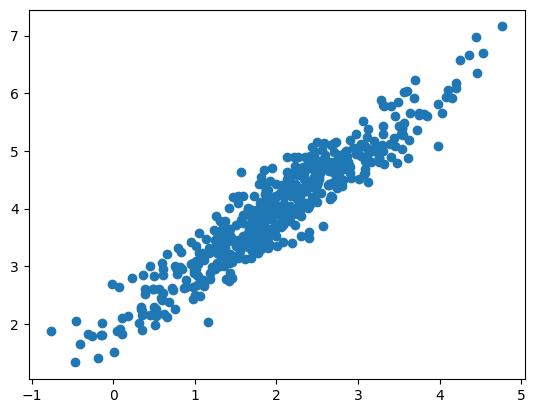

In [64]:
mn = torch.tensor([2, 4])
cov = torch.tensor([[0.9, 0.9], [0.8, 0.9]])
d = np.random.multivariate_normal(mn, cov, 500)


x, y = torch.tensor(d[:, 0]), torch.tensor(d[:, 1])

plt.scatter(x, y)

In [65]:
m = nn.Parameter(data=torch.randn(1))
c = nn.Parameter(data=torch.randn(1))

In [66]:
m, c

(Parameter containing:
 tensor([-1.6068], requires_grad=True),
 Parameter containing:
 tensor([0.2076], requires_grad=True))

In [38]:
ypred = m*x + c

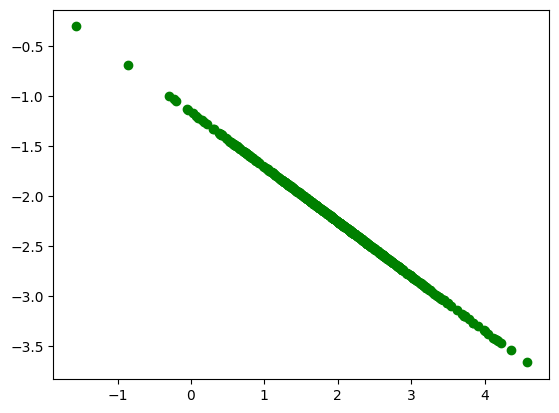

In [41]:
plt.scatter(x, ypred.detach(), c='g')

In [67]:
def mse(ypred, ytrue):
  return torch.mean((ypred - ytrue)**2)

In [68]:
mse(ypred, y)

tensor(17.4580, dtype=torch.float64)

In [71]:
for i in range(10):
  ypred = m * x + c
  loss = mse(ypred, y)
  lr = 1e-3
  loss.backward()
  print(loss)
  with torch.no_grad():
    m -= lr * m.grad
    c -= lr * c.grad

  m.grad.zero_()
  c.grad.zero_()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn